# Example of CausticSNUpy usage

## 1. Import packages.

In [1]:
import matplotlib.pyplot as plt
from CausticSNUpy import caustics

## 2. Set parameters.

In [2]:
fpath = 'test_data.txt'                         # your directory to the file

v_lower = 8000                                  # lower bound of velocity that real members should have (km/s)
v_upper = 17000                                 # upper bound of velocity that real members should have (km/s)
r_max = 10                                      # maximum projected distance from the center (Mpc)

H0 = 100
Om0 = 0.3
Ode0 = 0.7
Tcmb0 = 2.7

q = 25
r_res = 100                                     # resolution of r_grid
v_res = 100                                     # resolution of v_grid
BT_thr = "ALS"                                  # Binary Tree threshold

## 3. Create an instance of caustics with parameters and run the caustic technique.

In [3]:
C = caustics.Caustics(fpath, v_lower, v_upper, r_max, center_given=False, H0=H0, Om0=Om0, Ode0=Ode0, Tcmb0=Tcmb0, q=q, r_res=r_res, v_res=v_res)
C.run()

Unpacking data.
Hierarchical clustering done.
Number of candidate members : 299
Cluster center : RA = 234.8600140952381 deg, Dec =  21.744301285714286 deg, v = 12404.42474916388 km/s
Velocity Dispersion : 580.757513424028 km/s
Mean distance       : 0.877312290887182 Mpc
Number of galaxies in velocity and r_max limit : 299
Data unpacked.

Estimating number density.
Calculating h_c.
search range: 0.005 ~ 2
iteration : 30
h_c : 0.21645913287952784
Number density estimation done.

Minimizing S(k) to find kappa.
search range: 0.0 ~ 7.997730298597531e-05
iteration : 30
kappa found. kappa =  8.664294472973512e-06, S(k) = 2.6291421675123274.

Drawing caustic lines.
Caustic line calculation done.

Determining membership.
Membership determination done.



## 4. Draw the redshift diagram

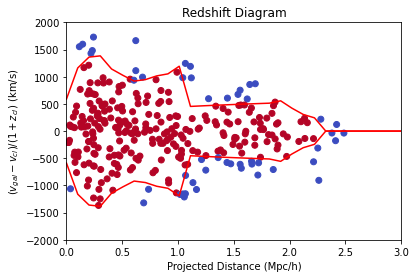

In [4]:
r_grid = C.r_grid
A = C.A

r = C.r
v = C.v
member = C.member

plt.plot(r_grid,  A, c = 'r')
plt.plot(r_grid, -A, c = 'r')
plt.scatter(r, v, c=member, cmap='coolwarm')

plt.xlim(0, 3)
plt.ylim(-2000, 2000)

plt.title('Redshift Diagram')
plt.xlabel('Projected Distance (Mpc/h)')
plt.ylabel('$(v_{gal}-v_{cl})/(1+z_{cl})$ (km/s)')

plt.show()

## 5. Add a 4th column to the original data indicating the membership.

In [5]:
C.create_member_list('member_list.txt')     # create file as member_list.txt